# QMBENCHIO (package openmolcas)
## Extract of High-throughput openmolcas io benchmark test(molcas_IO_test)

This test was carried out by thierry tran (attop project) in order to understand the influence of the scratch disk on calculation times
## Description of the test (molcas_IO_test)

- Submission of job array calculations to the cluster to test the I/O limit using /scratch as tmp for temporary files.

- Type of calculations: Single point CASSCF with OpenMolcas evaluating energies, gradient and nonadiabatic coupling

- Each subfolder contains N copies of the same calculation (1,10,100 and 1000) with an estimate of 500 MB required on disk for each individual calculation. 500 GB required for the 1000 test.

## Protocol
- A calculation submission script sub_molcas_nautilus_Xjob.sh is given for each set.

- The script is configured to make a job array with X calculations all writing using /scratch as tmp

- Submit each script individually to properly test the speed of 1 calculation and a single I/O on /scratch vs. X calculations and X writing on the /scratch

## Folder contents

The Xjob folders contain X geometry subfolders by calculations:
```
100job
|--geom_1
|--geom_2
...
|--geom_100
```

Each geometry folder can contain the following files:

```
--geom_X
  |--geometry_1.xyz #xyz file with molecular geometry
  |--mol_input_1.input #Input from molcas
  |--start.RasOrb #Guess for molecular orbitals
  |
  |--mol_input_1.output #Output of molcas calculations (contains the walltime)
  |--mol_input_1.status #file containing the final calculation message ("Happy landing" if execution without problem)
```

The walltime and cputime are in the last lines of mol_input_1.output


## recuperation des données pour tester le notebook

In [1]:
# Ajouter le répertoire du package au sys.path
import sys
import os

# Chemin relatif vers le répertoire src où se trouve le package
sys.path.append(os.path.abspath(os.path.join('../..', 'src')))

from openmolcas import bench_openmolcas as bo
import util

In [2]:
url = 'https://uncloud.univ-nantes.fr/index.php/s/pRfygww92Bygpyi/download/25sept.zip'
csv_file = '../../results/outputs/extract.csv'
bench_dir = './data/extracted/25sept'
#util.download_and_extract_zip(url)

## Extraction des valeurs de walltimes 

In [3]:
bench_dict=bo.openmolcas_extract_wall_values_from_bench(bench_dir,csv_file)

[]
[62.38, 62.37, 62.85, 62.59, 63.22, 62.46, 63.31, 67.22, 71.23, 62.58]


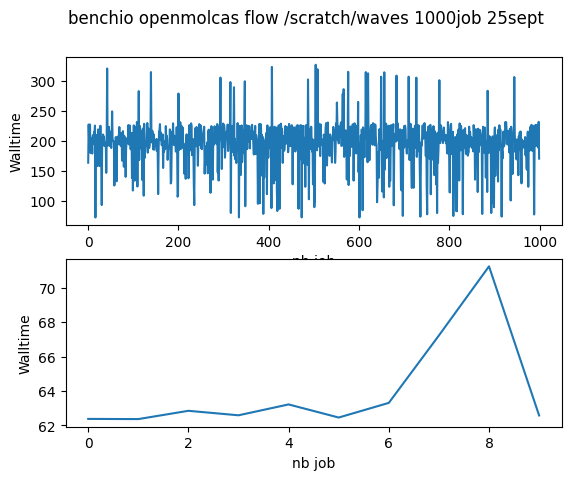

In [4]:
bo.openmolcas_display_bench_as_bar_chart2(bench_dict)